Initial Dataset Preview:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Null Value Count:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who 

C:\Users\Admin\AppData\Local\Temp\ipykernel_23560\2205021929.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_23560\2205021929.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

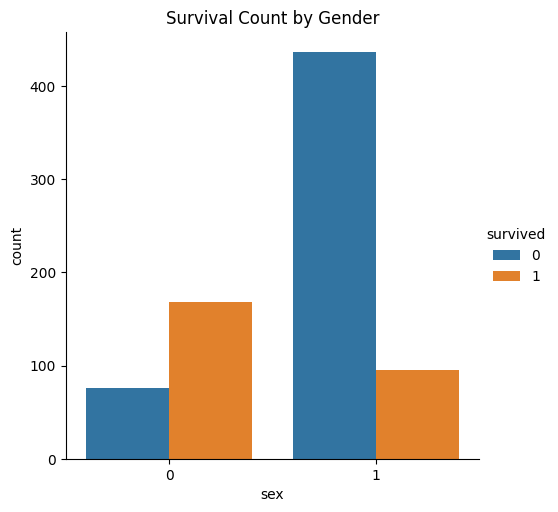

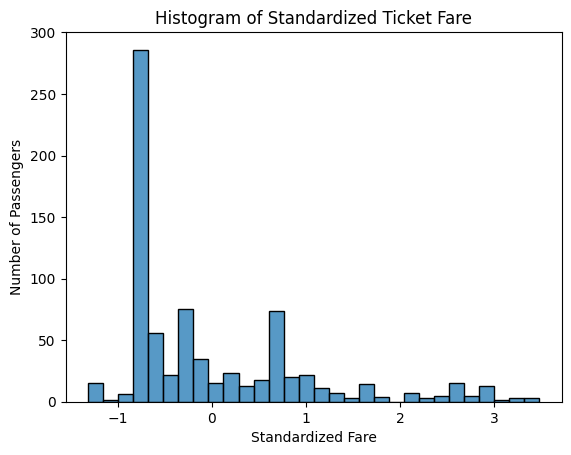

In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# -------------------- #
#    Data Preprocessing
# -------------------- #

# View first few rows
print("Initial Dataset Preview:")
print(titanic.head())

# 1. Check for null values
print("\nNull Value Count:")
print(titanic.isnull().sum())

# 2. Drop irrelevant or highly null columns
titanic.drop(columns=['deck', 'embark_town', 'alive'], inplace=True)

# 3. Fill missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# 4. Encode categorical features
titanic['sex'] = titanic['sex'].astype('category').cat.codes  # female=0, male=1
titanic['embarked'] = titanic['embarked'].astype('category').cat.codes  # S=2, C=0, Q=1
titanic['class'] = titanic['class'].astype('category').cat.codes  # First=0, Second=1, Third=2

# 5. Check for outliers in 'fare' using IQR method
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (titanic['fare'] < (Q1 - 1.5 * IQR)) | (titanic['fare'] > (Q3 + 1.5 * IQR))
print(f"\nNumber of Fare Outliers: {outlier_condition.sum()}")

# (Optional) Remove extreme outliers
titanic = titanic[~outlier_condition]

# 6. Apply scaling to 'age' and 'fare'
scaler = StandardScaler()
titanic[['age', 'fare']] = scaler.fit_transform(titanic[['age', 'fare']])

# Preview cleaned dataset
print("\nCleaned Dataset Preview:")
print(titanic.head())

# -------------------- #
#     Data Visualization
# -------------------- #

# 1. Pattern: Average age by gender
sns.barplot(x="sex", y="age", hue="sex", data=titanic)
plt.title("Average Age by Gender")
plt.show()

# 2. Pattern: Survival count by gender
sns.catplot(x="sex", hue="survived", kind="count", data=titanic)
plt.title("Survival Count by Gender")
plt.show()

# 3. Histogram of fare distribution (after scaling)
sns.histplot(data=titanic, x="fare", bins=30)
plt.title("Histogram of Standardized Ticket Fare")
plt.xlabel("Standardized Fare")
plt.ylabel("Number of Passengers")
plt.show()
